## Importing Libraries

In [3]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.utils import class_weight
from sklearn.model_selection import StratifiedKFold

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, classification_report, f1_score

import pickle
import os
import glob
import joblib


In [2]:
pip install sklearn

You should consider upgrading via the '/home/pankaj_v/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [123]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [124]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [125]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


## Importing Data

In [4]:
i = 1
frames = []
for name in os.listdir('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/client_data'):
    extents = os.path.splitext('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/client_data'+'/{}'.format(name))[1].lower()
    if extents == '.csv':
        df= pd.read_csv('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/client_data/{}'.format(name))
        frames.append(df)
        print('csv',df.shape)
    elif extents == '.xlsx':
        df= pd.read_excel('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/client_data/{}'.format(name))
        df.columns = df.columns.astype(str)
        frames.append(df)
        print('xlx',df.shape)

result =  pd.concat(frames, axis=0, ignore_index= True)

csv (180, 1060)
csv (244, 1060)
csv (24, 1060)
csv (200, 1060)
csv (302, 1060)
csv (16, 1060)
csv (72, 1060)
csv (244, 1060)
csv (48, 1060)
csv (90, 1060)
csv (314, 1060)
csv (78, 1060)
csv (191, 1060)
csv (310, 1060)
csv (294, 1060)
csv (132, 1059)
csv (224, 1060)
csv (224, 1060)
csv (18, 1060)
csv (236, 1060)
csv (160, 1060)
csv (42, 1060)
csv (246, 1060)
csv (302, 1060)
csv (262, 1060)
csv (162, 1060)
csv (142, 1060)
csv (154, 1060)
csv (256, 1060)
csv (192, 1060)
csv (252, 1060)
csv (78, 1060)
csv (270, 1060)
csv (186, 1060)
csv (29, 1060)
csv (276, 1060)
csv (120, 1060)
csv (80, 1060)
csv (28, 1060)
csv (249, 1060)
csv (120, 1060)
csv (248, 1060)
csv (348, 1060)
csv (290, 1060)
csv (102, 1060)
csv (180, 1060)
csv (110, 1060)
csv (198, 1060)
csv (132, 1060)
csv (222, 1060)
csv (77, 1060)
csv (110, 1060)
csv (10, 1060)
csv (60, 1060)
csv (254, 1060)
csv (36, 1060)
xlx (680, 1059)
csv (210, 1060)
csv (326, 1060)
csv (90, 1060)
csv (180, 1060)
csv (230, 1060)
csv (250, 1060)
csv (302,

In [5]:
result.head()

,,L*,a*,b*,X,Y,Z,Dominant Wavelenght,Whiteness,Purity,...,979.335,980.054,980.772,981.491,982.209,982.928,983.646,984.364,985.082,Unnamed: 1059
0,W_Calibration,100.0000,0.000000,0.00000,95.0422,100.0000,108.8760,565.016,99.9909,0.000017,...,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.00,NaN
1,F_Calibration,100.0000,0.000000,0.00000,108.1040,100.0000,39.2965,491.070,99.9909,0.000170,...,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.00,NaN
2,W_Calibration,100.0000,0.000000,0.00000,95.0422,100.0000,108.8760,565.016,99.9909,0.000017,...,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.00,NaN
3,F_Calibration,100.0000,0.000000,0.00000,108.1040,100.0000,39.2965,491.070,99.9909,0.000170,...,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.00,NaN
4,W_3566A2/33_H_Faint_0.30_SI1,99.7016,-0.840692,1.97141,93.8345,99.2302,104.8660,569.412,90.5883,0.017551,...,97.4079,97.6368,98.0312,97.8384,97.8231,-33.8442,-71.7545,-33.0428,-1563.49,NaN


## Data PrePrpcessing

In [6]:
result.rename(columns = {' ': 'Output'}, inplace=True)

In [11]:
result

,Output,L*,a*,b*,X,Y,Z,Dominant Wavelenght,Whiteness,Purity,...,979.335,980.054,980.772,981.491,982.209,982.928,983.646,984.364,985.082,Unnamed: 1059
0,W_Calibration,100.0000,0.000000,0.000000,95.0422,100.0000,108.8760,565.016,99.9909,0.000017,...,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.000000,NaN
1,F_Calibration,100.0000,0.000000,0.000000,108.1040,100.0000,39.2965,491.070,99.9909,0.000170,...,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.000000,NaN
2,W_Calibration,100.0000,0.000000,0.000000,95.0422,100.0000,108.8760,565.016,99.9909,0.000017,...,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.000000,NaN
3,F_Calibration,100.0000,0.000000,0.000000,108.1040,100.0000,39.2965,491.070,99.9909,0.000170,...,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.000000,NaN
4,W_3566A2/33_H_Faint_0.30_SI1,99.7016,-0.840692,1.971410,93.8345,99.2302,104.8660,569.412,90.5883,0.017551,...,97.4079,97.6368,98.0312,97.8384,97.8231,-33.8442,-71.7545,-33.0428,-1563.490000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15157,F_3465A2 | 290_D_None_0.504_SI2,99.5080,0.648675,-0.540982,107.1520,98.7331,39.1157,560.986,101.1440,0.004974,...,93.4979,93.4580,94.8663,94.1502,95.9501,-112.5000,-52.2321,63.0319,-192.287000,NaN
15158,W_1731A2 | 222_D_None_0.505_SI2,100.6330,0.048856,-0.402764,96.6356,101.6470,111.3350,474.727,103.3810,0.003009,...,104.2120,104.1180,103.6690,103.8840,103.5930,103.7660,76.8267,75.9124,0.834202,NaN
15159,F_1731A2 | 222_D_None_0.505_SI2,100.4500,-0.093514,-0.324395,109.3060,101.1680,39.9486,487.356,102.3070,0.001428,...,109.0160,109.4930,108.7480,107.4540,107.6220,244.2310,-208.0360,60.1064,-35.638300,NaN
15160,W_Calibration,100.0000,0.000000,0.000000,95.0422,100.0000,108.8760,565.016,99.9909,0.000017,...,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.000000,NaN


In [7]:
result_3 =result.loc[:,'Output']
result_2= result.loc[:,'300.377':'500.556']


In [8]:
df = pd.concat([result_2, result_3], axis=1)

In [9]:
df

,300.377,301.162,301.946,302.731,303.515,304.299,305.083,305.867,306.652,307.435,...,494.417,495.184,495.952,496.719,497.487,498.254,499.021,499.788,500.556,Output
0,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,...,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,W_Calibration
1,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,...,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,F_Calibration
2,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,...,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,W_Calibration
3,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,...,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,F_Calibration
4,93.9613,93.5905,93.5144,93.5858,94.0028,93.9788,94.2287,93.9844,94.2687,94.7686,...,99.3904,99.4136,99.4579,99.4692,99.4738,99.4969,99.5003,99.5163,99.5146,W_3566A2/33_H_Faint_0.30_SI1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15157,91.3955,91.7813,91.7767,91.4796,91.8255,92.1651,92.0624,92.2946,92.5775,93.0144,...,98.5877,98.4935,98.5486,98.9345,98.7406,98.6278,98.6294,98.2437,97.9790,F_3465A2 | 290_D_None_0.504_SI2
15158,101.1130,101.0970,100.8730,101.0810,101.0900,101.1650,101.3450,101.2900,101.3780,101.2470,...,101.8910,101.8970,101.9010,101.8870,101.8680,101.8600,101.8740,101.8860,101.9080,W_1731A2 | 222_D_None_0.505_SI2
15159,101.6200,102.5110,102.3480,102.3430,102.6460,102.5480,102.5460,103.0950,103.3390,103.3110,...,100.6560,100.8020,100.9910,101.2650,101.1600,101.2250,101.2670,101.2640,101.1770,F_1731A2 | 222_D_None_0.505_SI2
15160,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,...,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,W_Calibration


In [29]:
s = df_with_w['Output'][6]

In [32]:
re.search(r'Faint|None|Medium|Very Strong', s).group()

'None'

In [31]:
m.group()

'None'

In [10]:
df_without_calb = df[~df['Output'].str.contains(('Calibration|CALIBARTION|CALIBARATION'),case=False, regex=True, na = False)]
df_without_calb.reset_index(drop=True)

,300.377,301.162,301.946,302.731,303.515,304.299,305.083,305.867,306.652,307.435,...,494.417,495.184,495.952,496.719,497.487,498.254,499.021,499.788,500.556,Output
0,93.9613,93.5905,93.5144,93.5858,94.0028,93.9788,94.2287,93.9844,94.2687,94.7686,...,99.3904,99.4136,99.4579,99.4692,99.4738,99.4969,99.5003,99.5163,99.5146,W_3566A2/33_H_Faint_0.30_SI1
1,75.1519,75.1644,75.2794,75.2995,75.3298,75.3446,75.3495,75.2201,75.0491,74.9531,...,175.4670,173.5580,172.0500,169.9270,168.0190,165.8780,164.4310,162.5840,161.0230,F_3566A2/33_H_Faint_0.30_SI1
2,95.5023,95.4314,95.2679,95.4398,96.0739,96.0221,96.2585,96.0292,96.0922,96.1002,...,100.7490,100.7860,100.8520,100.8810,100.8980,100.9530,100.9980,101.0070,101.0410,W_3568A2/216_J_None_0.402_VS1
3,74.3381,74.2685,74.3874,74.5665,74.5934,74.5166,74.3065,74.0181,74.0716,74.1394,...,105.9110,105.8460,105.6110,105.1390,104.7110,104.6110,104.6340,104.2400,103.8770,F_3568A2/216_J_None_0.402_VS1
4,96.7677,96.5512,96.1780,96.4226,96.8096,96.9811,96.8336,96.8316,97.0489,96.5584,...,99.7644,99.8566,99.9219,99.9866,100.0560,100.1290,100.1850,100.2390,100.2840,W_3552A2/307_H_None_0.338_VVS1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10008,86.6768,86.4965,86.1643,86.1489,85.7981,85.5522,85.2819,85.1282,85.1501,85.3028,...,112.5730,112.2170,111.9990,111.5080,111.0090,110.5800,110.2340,110.0800,109.7620,F_1732A2 | 409_G_None_0.501_SI2
10009,97.1866,97.0617,97.2634,97.6980,97.2498,97.3879,97.5460,97.7210,98.4481,98.3731,...,99.3597,99.3883,99.3982,99.4064,99.4265,99.4352,99.4260,99.4587,99.4841,W_3465A2 | 290_D_None_0.504_SI2
10010,91.3955,91.7813,91.7767,91.4796,91.8255,92.1651,92.0624,92.2946,92.5775,93.0144,...,98.5877,98.4935,98.5486,98.9345,98.7406,98.6278,98.6294,98.2437,97.9790,F_3465A2 | 290_D_None_0.504_SI2
10011,101.1130,101.0970,100.8730,101.0810,101.0900,101.1650,101.3450,101.2900,101.3780,101.2470,...,101.8910,101.8970,101.9010,101.8870,101.8680,101.8600,101.8740,101.8860,101.9080,W_1731A2 | 222_D_None_0.505_SI2


In [103]:
df_with_w = df_without_calb[df_without_calb['Output'].str.split('_').str[0] == 'W']

In [104]:
df_with_w

,300.377,301.162,301.946,302.731,303.515,304.299,305.083,305.867,306.652,307.435,...,494.417,495.184,495.952,496.719,497.487,498.254,499.021,499.788,500.556,Output
4,93.9613,93.5905,93.5144,93.5858,94.0028,93.9788,94.2287,93.9844,94.2687,94.7686,...,99.3904,99.4136,99.4579,99.4692,99.4738,99.4969,99.5003,99.5163,99.5146,W_3566A2/33_H_Faint_0.30_SI1
6,95.5023,95.4314,95.2679,95.4398,96.0739,96.0221,96.2585,96.0292,96.0922,96.1002,...,100.7490,100.7860,100.8520,100.8810,100.8980,100.9530,100.9980,101.0070,101.0410,W_3568A2/216_J_None_0.402_VS1
10,96.7677,96.5512,96.1780,96.4226,96.8096,96.9811,96.8336,96.8316,97.0489,96.5584,...,99.7644,99.8566,99.9219,99.9866,100.0560,100.1290,100.1850,100.2390,100.2840,W_3552A2/307_H_None_0.338_VVS1
12,92.1969,91.9748,91.8531,92.1156,92.3446,92.4588,92.2696,92.1126,92.2204,91.8990,...,97.5908,97.6233,97.6471,97.6651,97.6900,97.7098,97.7755,97.8271,97.9303,W_3568A2/213_J_None_0.437_VS1
16,97.9493,97.5832,97.8770,97.8452,98.2188,98.1894,98.1268,98.2943,97.7774,97.8066,...,101.2900,101.2600,101.2400,101.1920,101.1770,101.1210,101.0760,101.0360,101.0170,W_3569A2/149_G_None_0.301_VVS1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15146,102.0850,102.2880,102.4110,102.7420,102.2430,102.2220,102.2150,102.2560,102.2080,102.2340,...,103.5720,103.5860,103.5770,103.5770,103.5560,103.5500,103.5720,103.5530,103.5720,W_3464A2 | 74_E_None_0.613_VS2
15150,97.9494,98.1799,98.3628,98.0291,98.3103,98.4854,98.0282,97.5581,97.6816,97.6634,...,99.6601,99.6642,99.6642,99.6623,99.6699,99.6462,99.6258,99.6342,99.6212,W_1734A2 | 228_F_Faint_0.504_SI2
15152,96.4612,96.7232,96.9706,96.8789,96.7985,97.1090,97.2549,97.4836,97.5302,97.3204,...,99.6427,99.6526,99.6476,99.6427,99.6476,99.6413,99.6300,99.6556,99.6533,W_1732A2 | 409_G_None_0.501_SI2
15156,97.1866,97.0617,97.2634,97.6980,97.2498,97.3879,97.5460,97.7210,98.4481,98.3731,...,99.3597,99.3883,99.3982,99.4064,99.4265,99.4352,99.4260,99.4587,99.4841,W_3465A2 | 290_D_None_0.504_SI2


In [105]:
df_with_w['size'] = df_with_w['Output'].str.extract(pat = r'([0-9][.][0-9]+)').astype(float)
df_with_w['quality'] = df_with_w['Output'].str.extract(pat=r'(Faint|None|Medium|Very Strong)', expand=False)
df_with_w['color'] = df_with_w['Output'].str.extract(pat=r'(_[D-M]_|_[D-M]/|_[D-M] |_ [D-M])', expand=False, ).str.extract(r'([D-M])')


In [106]:
df_with_w.dropna(inplace=True)

In [107]:
df_with_w


,300.377,301.162,301.946,302.731,303.515,304.299,305.083,305.867,306.652,307.435,...,496.719,497.487,498.254,499.021,499.788,500.556,Output,size,quality,color
4,93.9613,93.5905,93.5144,93.5858,94.0028,93.9788,94.2287,93.9844,94.2687,94.7686,...,99.4692,99.4738,99.4969,99.5003,99.5163,99.5146,W_3566A2/33_H_Faint_0.30_SI1,0.300,Faint,H
6,95.5023,95.4314,95.2679,95.4398,96.0739,96.0221,96.2585,96.0292,96.0922,96.1002,...,100.8810,100.8980,100.9530,100.9980,101.0070,101.0410,W_3568A2/216_J_None_0.402_VS1,0.402,None,J
10,96.7677,96.5512,96.1780,96.4226,96.8096,96.9811,96.8336,96.8316,97.0489,96.5584,...,99.9866,100.0560,100.1290,100.1850,100.2390,100.2840,W_3552A2/307_H_None_0.338_VVS1,0.338,None,H
12,92.1969,91.9748,91.8531,92.1156,92.3446,92.4588,92.2696,92.1126,92.2204,91.8990,...,97.6651,97.6900,97.7098,97.7755,97.8271,97.9303,W_3568A2/213_J_None_0.437_VS1,0.437,None,J
16,97.9493,97.5832,97.8770,97.8452,98.2188,98.1894,98.1268,98.2943,97.7774,97.8066,...,101.1920,101.1770,101.1210,101.0760,101.0360,101.0170,W_3569A2/149_G_None_0.301_VVS1,0.301,None,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15146,102.0850,102.2880,102.4110,102.7420,102.2430,102.2220,102.2150,102.2560,102.2080,102.2340,...,103.5770,103.5560,103.5500,103.5720,103.5530,103.5720,W_3464A2 | 74_E_None_0.613_VS2,0.613,None,E
15150,97.9494,98.1799,98.3628,98.0291,98.3103,98.4854,98.0282,97.5581,97.6816,97.6634,...,99.6623,99.6699,99.6462,99.6258,99.6342,99.6212,W_1734A2 | 228_F_Faint_0.504_SI2,0.504,Faint,F
15152,96.4612,96.7232,96.9706,96.8789,96.7985,97.1090,97.2549,97.4836,97.5302,97.3204,...,99.6427,99.6476,99.6413,99.6300,99.6556,99.6533,W_1732A2 | 409_G_None_0.501_SI2,0.501,None,G
15156,97.1866,97.0617,97.2634,97.6980,97.2498,97.3879,97.5460,97.7210,98.4481,98.3731,...,99.4064,99.4265,99.4352,99.4260,99.4587,99.4841,W_3465A2 | 290_D_None_0.504_SI2,0.504,None,D


In [108]:
df_with_w.drop(columns=['Output'], inplace=True)

In [109]:
df_with_w.reset_index(drop=True, inplace=True)

In [12]:
# df_without_calb.to_csv('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/Processed_data/df_without_calb_all.csv')

In [110]:
df_train = df_with_w.copy()
df_train.reset_index(drop=True, inplace=True)

## Reomoving Outliers

In [117]:
df_train.drop(index = df_train['300.377'].astype('float').idxmax(), inplace=True)
df_train['300.377'].max()
# df_train.drop(index=df_train['300.377'].astype('float').idxmin(), inplace=True)
# df_train['300.377'].min()

211.1

In [118]:
df_train.reset_index(drop=True, inplace=True)

In [172]:
df_train.to_csv('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/Processed_data/df_train_300_500_3_08.csv')

In [3]:
df_train = pd.read_csv('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/Processed_data/df_train_300_500_3_08.csv')

In [4]:
df_train.drop(columns='Unnamed: 0', inplace=True)

# Model Implementation

In [119]:
df_X_train = df_train.drop(columns='color')

In [120]:
df_X_train

,300.377,301.162,301.946,302.731,303.515,304.299,305.083,305.867,306.652,307.435,...,495.184,495.952,496.719,497.487,498.254,499.021,499.788,500.556,size,quality
0,93.9613,93.5905,93.5144,93.5858,94.0028,93.9788,94.2287,93.9844,94.2687,94.7686,...,99.4136,99.4579,99.4692,99.4738,99.4969,99.5003,99.5163,99.5146,0.300,Faint
1,95.5023,95.4314,95.2679,95.4398,96.0739,96.0221,96.2585,96.0292,96.0922,96.1002,...,100.7860,100.8520,100.8810,100.8980,100.9530,100.9980,101.0070,101.0410,0.402,None
2,96.7677,96.5512,96.1780,96.4226,96.8096,96.9811,96.8336,96.8316,97.0489,96.5584,...,99.8566,99.9219,99.9866,100.0560,100.1290,100.1850,100.2390,100.2840,0.338,None
3,92.1969,91.9748,91.8531,92.1156,92.3446,92.4588,92.2696,92.1126,92.2204,91.8990,...,97.6233,97.6471,97.6651,97.6900,97.7098,97.7755,97.8271,97.9303,0.437,None
4,97.9493,97.5832,97.8770,97.8452,98.2188,98.1894,98.1268,98.2943,97.7774,97.8066,...,101.2600,101.2400,101.1920,101.1770,101.1210,101.0760,101.0360,101.0170,0.301,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4985,102.0850,102.2880,102.4110,102.7420,102.2430,102.2220,102.2150,102.2560,102.2080,102.2340,...,103.5860,103.5770,103.5770,103.5560,103.5500,103.5720,103.5530,103.5720,0.613,None
4986,97.9494,98.1799,98.3628,98.0291,98.3103,98.4854,98.0282,97.5581,97.6816,97.6634,...,99.6642,99.6642,99.6623,99.6699,99.6462,99.6258,99.6342,99.6212,0.504,Faint
4987,96.4612,96.7232,96.9706,96.8789,96.7985,97.1090,97.2549,97.4836,97.5302,97.3204,...,99.6526,99.6476,99.6427,99.6476,99.6413,99.6300,99.6556,99.6533,0.501,None
4988,97.1866,97.0617,97.2634,97.6980,97.2498,97.3879,97.5460,97.7210,98.4481,98.3731,...,99.3883,99.3982,99.4064,99.4265,99.4352,99.4260,99.4587,99.4841,0.504,None


In [7]:
a = df_X_train.quality.value_counts().keys()

In [92]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(df_X_train[['quality']])

OneHotEncoder(handle_unknown='ignore')

In [121]:
enc_ = joblib.load('/home/pankaj_v/Documents/Data_analysis_dixit/Models/enc.joblib')

In [126]:
x_trans = pd.DataFrame(enc_.transform(df_X_train[['quality']]).toarray())
X = pd.concat([df_X_train.iloc[:,:-1], x_trans], axis=1)

In [127]:
X

,300.377,301.162,301.946,302.731,303.515,304.299,305.083,305.867,306.652,307.435,...,497.487,498.254,499.021,499.788,500.556,size,0,1,2,3
0,93.9613,93.5905,93.5144,93.5858,94.0028,93.9788,94.2287,93.9844,94.2687,94.7686,...,99.4738,99.4969,99.5003,99.5163,99.5146,0.300,1.0,0.0,0.0,0.0
1,95.5023,95.4314,95.2679,95.4398,96.0739,96.0221,96.2585,96.0292,96.0922,96.1002,...,100.8980,100.9530,100.9980,101.0070,101.0410,0.402,0.0,0.0,1.0,0.0
2,96.7677,96.5512,96.1780,96.4226,96.8096,96.9811,96.8336,96.8316,97.0489,96.5584,...,100.0560,100.1290,100.1850,100.2390,100.2840,0.338,0.0,0.0,1.0,0.0
3,92.1969,91.9748,91.8531,92.1156,92.3446,92.4588,92.2696,92.1126,92.2204,91.8990,...,97.6900,97.7098,97.7755,97.8271,97.9303,0.437,0.0,0.0,1.0,0.0
4,97.9493,97.5832,97.8770,97.8452,98.2188,98.1894,98.1268,98.2943,97.7774,97.8066,...,101.1770,101.1210,101.0760,101.0360,101.0170,0.301,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4985,102.0850,102.2880,102.4110,102.7420,102.2430,102.2220,102.2150,102.2560,102.2080,102.2340,...,103.5560,103.5500,103.5720,103.5530,103.5720,0.613,0.0,0.0,1.0,0.0
4986,97.9494,98.1799,98.3628,98.0291,98.3103,98.4854,98.0282,97.5581,97.6816,97.6634,...,99.6699,99.6462,99.6258,99.6342,99.6212,0.504,1.0,0.0,0.0,0.0
4987,96.4612,96.7232,96.9706,96.8789,96.7985,97.1090,97.2549,97.4836,97.5302,97.3204,...,99.6476,99.6413,99.6300,99.6556,99.6533,0.501,0.0,0.0,1.0,0.0
4988,97.1866,97.0617,97.2634,97.6980,97.2498,97.3879,97.5460,97.7210,98.4481,98.3731,...,99.4265,99.4352,99.4260,99.4587,99.4841,0.504,0.0,0.0,1.0,0.0


### Train Test Split

In [228]:
joblib.dump(enc,'/home/pankaj_v/Documents/Data_analysis_dixit/Models/enc.joblib' )

['/home/pankaj_v/Documents/Data_analysis_dixit/Models/enc.joblib']

In [129]:
Y = df_train.iloc[:,-1]

In [131]:
X.shape, Y.shape

((4990, 264), (4990,))

In [132]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state =42, stratify = Y)

In [133]:
balanced_ = class_weight.compute_class_weight(class_weight='balanced', classes=Y.value_counts().keys(),y=Y)
balanced = dict(zip(df_train['color'].value_counts().keys(),balanced_))
balanced

{'G': 0.6183395291201983,
 'D': 0.6191066997518611,
 'F': 0.6816939890710383,
 'E': 0.8234323432343235,
 'H': 0.8486394557823129,
 'I': 0.9559386973180076,
 'J': 1.0352697095435686,
 'K': 1.4257142857142857,
 'L': 7.796875,
 'M': 15.121212121212121}

### ExtraTreesClassifier

#### Stratified fold

In [168]:
et_skf = ExtraTreesClassifier( 
                            criterion = 'entropy',
                            class_weight=balanced, 
                            warm_start=True, 
                            max_samples=None, 
                            bootstrap=True,
                            max_depth=13,
                            n_estimators=250
                            )

In [169]:
lst_accu_stratified = []
lst_accu_stratified_train = []
skf = StratifiedKFold(n_splits=10,shuffle=True)

for train_index, test_index in skf.split(X_train, Y_train):
  x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
  y_train_fold, y_test_fold = Y[train_index], Y[test_index]

  et_skf.fit(x_train_fold, y_train_fold)
  y_train_pred = et_skf.predict(x_train_fold)
  Y_pred = et_skf.predict(x_test_fold)
  # print(classification_report(y_test_fold, Y_pred))

  lst_accu_stratified.append(metrics.f1_score(y_test_fold,Y_pred,average='weighted'))
  lst_accu_stratified_train.append(et_skf.score(x_train_fold,y_train_fold))

print(f"train_accuracy={lst_accu_stratified_train}")
print(f"f1_score={lst_accu_stratified}")

print(f" over all train_accuracy={np.mean(lst_accu_stratified_train)*100}")
print(f"f1_score_mean = {np.mean(lst_accu_stratified)*100}")

train_accuracy=[0.9716035634743875, 0.9173162583518931, 0.9190091845254662, 0.9176175897578626, 0.9198441413860284, 0.9184525466184247, 0.918174227664904, 0.9178959087113833, 0.917060951850821, 0.9190091845254662]
f1_score=[0.49480707001644225, 0.980031861939682, 0.9650714445191879, 0.9774195799475187, 0.9573692880513783, 0.96987949641285, 0.9724638077580064, 0.9749342514155037, 0.9825255042169198, 0.9650698435367971]
 over all train_accuracy=92.35983556866637
f1_score_mean = 92.39572147814286


In [170]:
y_preds  = et_skf.predict(X_test)

In [171]:
print(classification_report(Y_test, y_preds))

              precision    recall  f1-score   support

           D       0.91      0.93      0.92       161
           E       0.78      0.79      0.79       121
           F       0.85      0.81      0.83       146
           G       0.83      0.80      0.81       161
           H       0.82      0.76      0.79       118
           I       0.78      0.85      0.81       105
           J       0.82      0.83      0.83        96
           K       0.82      0.96      0.88        70
           L       0.88      0.54      0.67        13
           M       1.00      0.71      0.83         7

    accuracy                           0.83       998
   macro avg       0.85      0.80      0.82       998
weighted avg       0.83      0.83      0.83       998



In [172]:
cf_matrix = confusion_matrix(Y_test, y_preds, labels = sorted(Y.value_counts().keys()))

In [173]:
ticks = sorted(Y.value_counts().keys())

<AxesSubplot:>

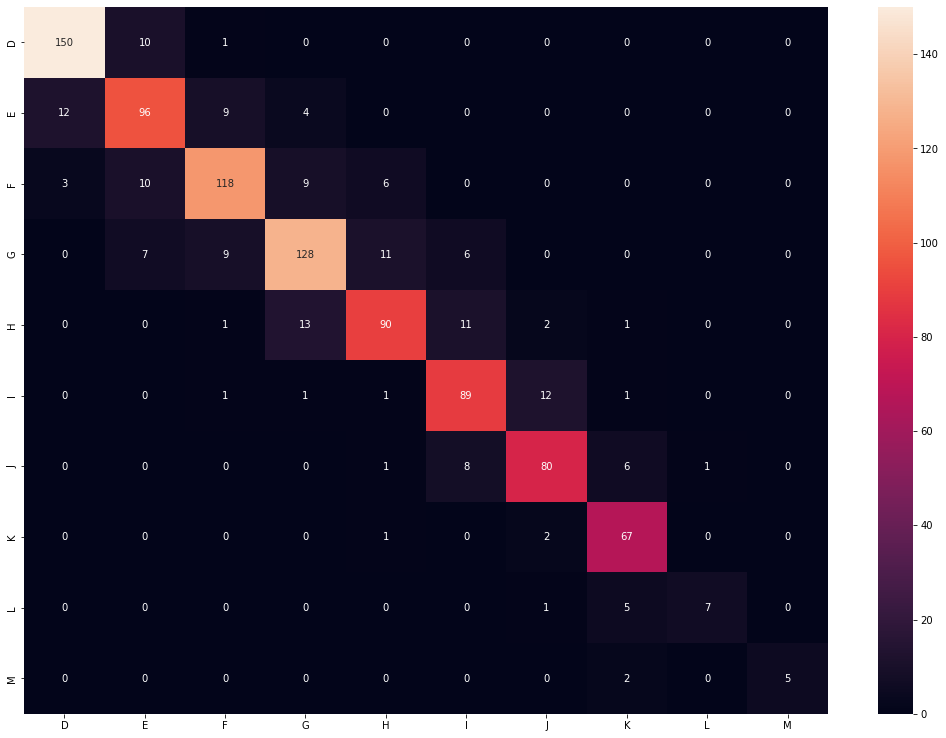

In [174]:
plt.figure(figsize=(18, 13))
sns.heatmap(cf_matrix,annot=True,xticklabels =ticks ,yticklabels=ticks, fmt='d')

In [175]:
joblib.dump(
        et_skf,  
        os.path.join('/home/pankaj_v/Documents/Data_analysis_dixit/Models', f"f1_{round(np.mean(lst_accu_stratified)*100,2)}_16_08.pkl") 
    )

['/home/pankaj_v/Documents/Data_analysis_dixit/Models/f1_92.4_16_08.pkl']